In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [3]:
# Ścieżki do katalogów z danymi
clean_data_dir = "D:/labSem6/Obrazy3/ObrazyCzyste"
noisy_data_dir = "D:/labSem6/Obrazy3/ObrazySzum"
# Rozmiar obrazów
image_size = (500, 500)
mean = 0  # Średnia szumu gaussowskiego
std_dev = 70  # Odchylenie standardowe szumu gaussowskiego
# Funkcja do dodawania szumu gaussowskiego do obrazów
def add_gaussian_noise(image, mean, std_dev):
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Tworzenie katalogów docelowych
os.makedirs(clean_data_dir, exist_ok=True)
os.makedirs(noisy_data_dir, exist_ok=True)

# Tworzenie zaszumionych obrazów
noisy_image_files = os.listdir(clean_data_dir)
for image_file in noisy_image_files:
    image_path = os.path.join(clean_data_dir, image_file)
    image = Image.open(image_path)
    image_array = np.array(image)
    noisy_image_array = add_gaussian_noise(image_array, mean, std_dev)
    noisy_image = Image.fromarray(noisy_image_array)
    noisy_image.save(os.path.join(noisy_data_dir, image_file))

KeyboardInterrupt: 

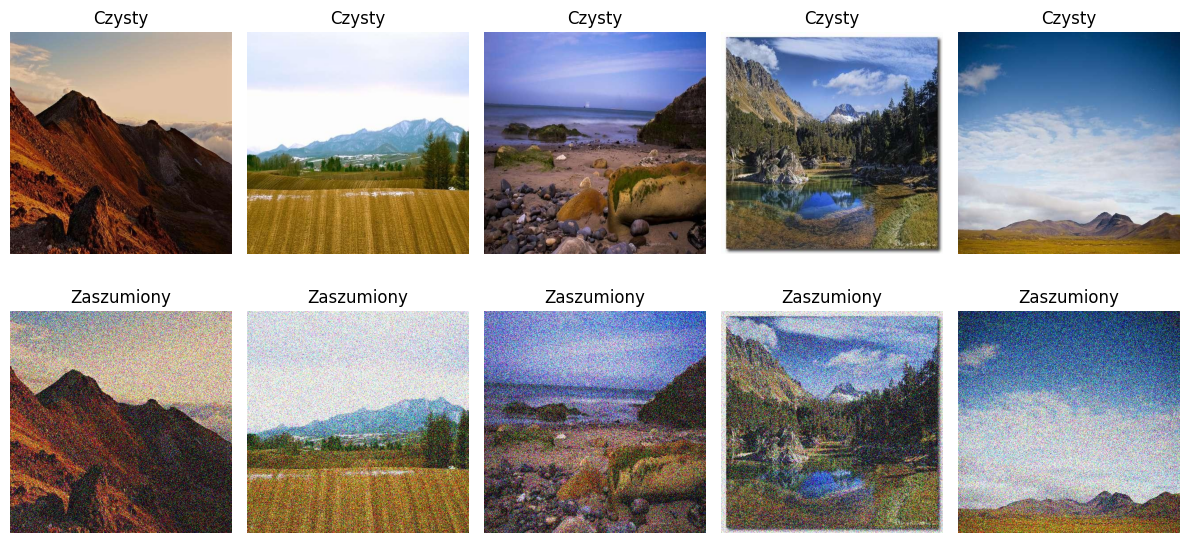

In [5]:
# Wybór kilku przykładowych obrazów do wyświetlenia
sample_images = np.random.choice(os.listdir(clean_data_dir), size=5, replace=False)

# Wyświetlanie obrazów przed i po zaszumieniu
fig, axes = plt.subplots(nrows=2, ncols=len(sample_images), figsize=(12, 6))
for i, image_file in enumerate(sample_images):
    clean_image = plt.imread(os.path.join(clean_data_dir, image_file))
    noisy_image = plt.imread(os.path.join(noisy_data_dir, image_file))

    axes[0, i].imshow(clean_image)
    axes[0, i].set_title("Czysty")
    axes[0, i].axis("off")

    axes[1, i].imshow(noisy_image)
    axes[1, i].set_title("Zaszumiony")
    axes[1, i].axis("off")


plt.tight_layout()
